Open inputs:

In [1]:
from PIL import Image
import pickle
import numpy as np

path = '/Users/manu/boulot/unit_solutions/data/toy_data/are_detections_on_same_line/'

with open(path + "masks.pkl", "rb") as f:
    masks = pickle.load(f)

fname_img = '/Users/manu/boulot/unit_solutions/data/datasets/segmentation/cellpose/test/48159-1_2.jpg'
img_pil = Image.open(fname_img)
img_np = np.asarray(img_pil)

Instanciate symbol detector

In [2]:
from signreader.engine.symbol import SymbolDetector

symbdetector = SymbolDetector()

Run

In [3]:
boxes, class_names = symbdetector(img_np)


0: 1920x2560 1 bahnhof, 1 bushof, 3 strassenbahns, 1842.0ms
Speed: 82.8ms preprocess, 1842.0ms inference, 4.6ms postprocess per image at shape (1, 3, 1920, 2560)


In [37]:
def which_boxes_are_in_mask(boxes, mask):
    box_list = []
    for box in boxes:
        x_box, y_box, _, _ = box.xywh[0]
        x_box = int(np.round(x_box))
        y_box = int(np.round(y_box))

        print(f'x_box: {x_box}, y_box: {y_box}, mask(x_box, y_box): {mask[y_box, x_box]}')

        if mask[y_box, x_box]==True:
            box_list.append(box)
    return box_list

In [42]:
idx_instance = 3
mask = masks==idx_instance

box_list = which_boxes_are_in_mask(boxes=boxes, mask=mask)

x_box: 474, y_box: 297, mask(x_box, y_box): True
x_box: 500, y_box: 271, mask(x_box, y_box): True
x_box: 479, y_box: 270, mask(x_box, y_box): True
x_box: 466, y_box: 152, mask(x_box, y_box): False
x_box: 168, y_box: 193, mask(x_box, y_box): False


In [39]:
box_list

[ultralytics.engine.results.Boxes object with attributes:
 
 cls: tensor([11.])
 conf: tensor([0.4671])
 data: tensor([[4.5623e+02, 1.4027e+02, 4.7568e+02, 1.6284e+02, 4.6709e-01, 1.1000e+01]])
 id: None
 is_track: False
 orig_shape: (512, 683)
 shape: torch.Size([1, 6])
 xywh: tensor([[465.9575, 151.5517,  19.4463,  22.5721]])
 xywhn: tensor([[0.6822, 0.2960, 0.0285, 0.0441]])
 xyxy: tensor([[456.2343, 140.2656, 475.6806, 162.8378]])
 xyxyn: tensor([[0.6680, 0.2740, 0.6965, 0.3180]])]

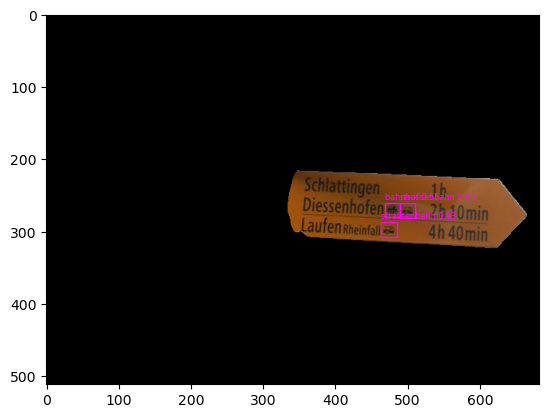

In [43]:
img_np_focus = np.zeros(img_np.shape, dtype=np.uint8)
for channel in range(3):
    img_np_focus[:,:,channel] = img_np[:,:,channel] * mask

import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig, ax = plt.subplots(1,1)
ax.imshow(img_np_focus)

for box in box_list:
    x1, y1, x2, y2 = box.xyxy[0]
    confidence = float(box.conf[0])
    class_id = int(box.cls[0])
    label = class_names[class_id]

    # Ajouter une boîte rectangle
    width, height = x2 - x1, y2 - y1
    rect = patches.Rectangle((x1, y1), width, height,
                             linewidth=1, edgecolor='magenta', facecolor='none')
    ax.add_patch(rect)

    # Ajouter le texte (label + score)
    text = f"{label} {confidence:.2f}"
    ax.text(x1, y1 - 5, text,
        color='magenta',
        fontsize='xx-small')

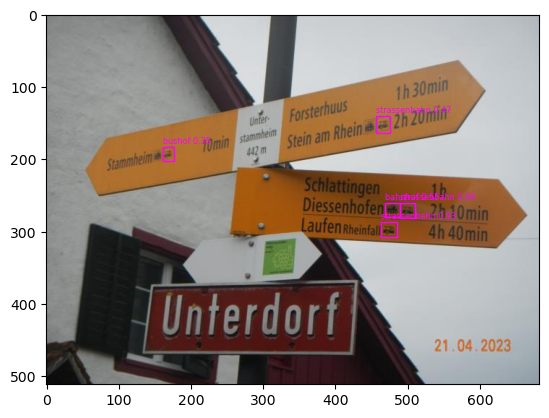

In [41]:
fig, ax = plt.subplots(1,1)
ax.imshow(img_np)

for box in boxes:
    x1, y1, x2, y2 = box.xyxy[0]
    confidence = float(box.conf[0])
    class_id = int(box.cls[0])
    label = class_names[class_id]

    # Ajouter une boîte rectangle
    width, height = x2 - x1, y2 - y1
    rect = patches.Rectangle((x1, y1), width, height,
                             linewidth=1, edgecolor='magenta', facecolor='none')
    ax.add_patch(rect)

    # Ajouter le texte (label + score)
    text = f"{label} {confidence:.2f}"
    ax.text(x1, y1 - 5, text,
        color='magenta',
        fontsize='xx-small')